In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("NY-House-Dataset.csv")

In [4]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [5]:
df.shape

(4801, 17)

In [6]:
X = df.drop(['PRICE'], axis=1)
y = df["PRICE"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## **Wstępna analiza**

In [8]:
df_learning = X_train.join(y_train)

In [9]:
df_learning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3840 entries, 1606 to 3124
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  3840 non-null   object 
 1   TYPE                         3840 non-null   object 
 2   BEDS                         3840 non-null   int64  
 3   BATH                         3840 non-null   float64
 4   PROPERTYSQFT                 3840 non-null   float64
 5   ADDRESS                      3840 non-null   object 
 6   STATE                        3840 non-null   object 
 7   MAIN_ADDRESS                 3840 non-null   object 
 8   ADMINISTRATIVE_AREA_LEVEL_2  3840 non-null   object 
 9   LOCALITY                     3840 non-null   object 
 10  SUBLOCALITY                  3840 non-null   object 
 11  STREET_NAME                  3840 non-null   object 
 12  LONG_NAME                    3840 non-null   object 
 13  FORMATTED_ADDRE

In [10]:
df_learning.describe()

,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE
count,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3.840000e+03
mean,3.384115,2.389865,2189.292732,40.713882,-73.941526,1.960915e+06
std,2.491477,1.783930,2230.784843,0.087584,0.100982,5.238941e+06
min,1.000000,0.000000,246.000000,40.499546,-74.253033,2.494000e+03
25%,2.000000,1.000000,1230.000000,40.639632,-73.987443,4.990000e+05
50%,3.000000,2.000000,2184.207862,40.726708,-73.949182,8.490000e+05
75%,4.000000,3.000000,2184.207862,40.772873,-73.869266,1.499000e+06
max,40.000000,32.000000,55300.000000,40.912729,-73.703904,1.950000e+08


array([[<AxesSubplot: title={'center': 'BEDS'}>,
        <AxesSubplot: title={'center': 'BATH'}>],
       [<AxesSubplot: title={'center': 'PROPERTYSQFT'}>,
        <AxesSubplot: title={'center': 'LATITUDE'}>],
       [<AxesSubplot: title={'center': 'LONGITUDE'}>,
        <AxesSubplot: title={'center': 'PRICE'}>]], dtype=object)

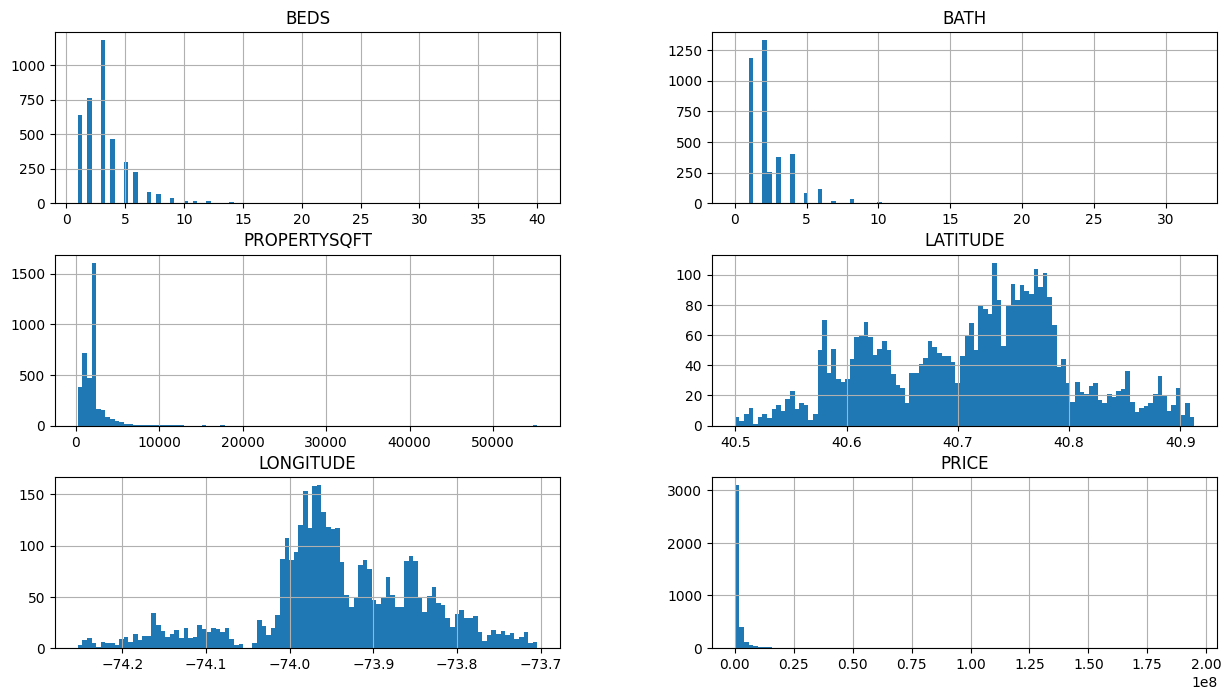

In [11]:
df_learning.hist(bins=100, figsize=(15,8))

array([[<AxesSubplot: title={'center': 'BEDS'}>,
        <AxesSubplot: title={'center': 'BATH'}>],
       [<AxesSubplot: title={'center': 'PROPERTYSQFT'}>,
        <AxesSubplot: title={'center': 'PRICE'}>]], dtype=object)

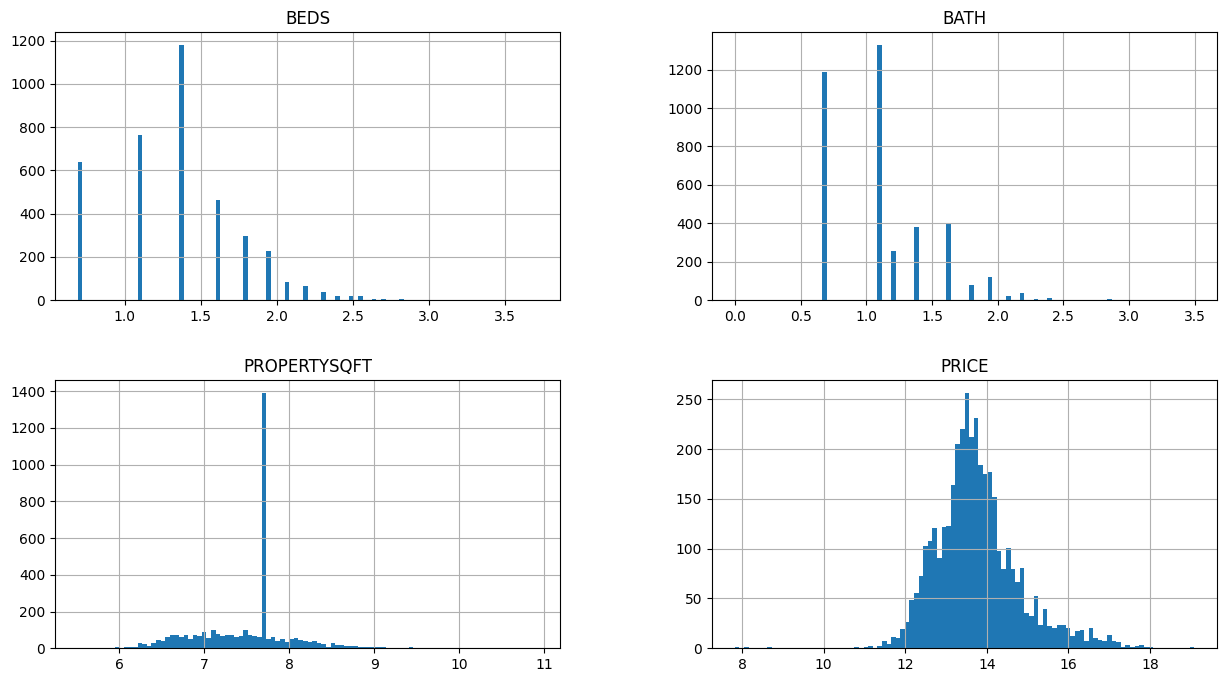

In [12]:
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE"]]
np.log1p(df_num).hist(bins=100, figsize=(15,8))

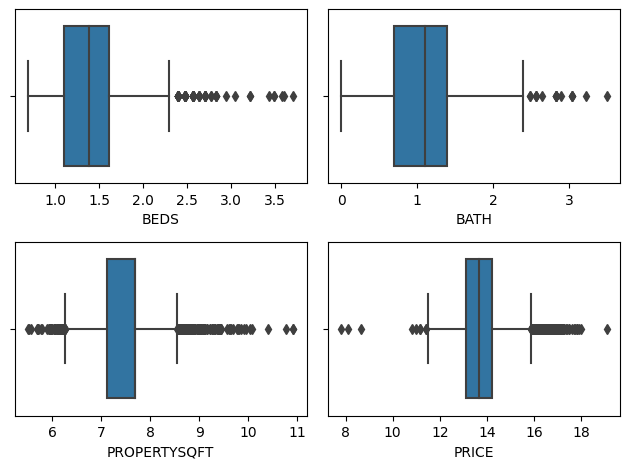

In [13]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num, x= np.log1p(df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

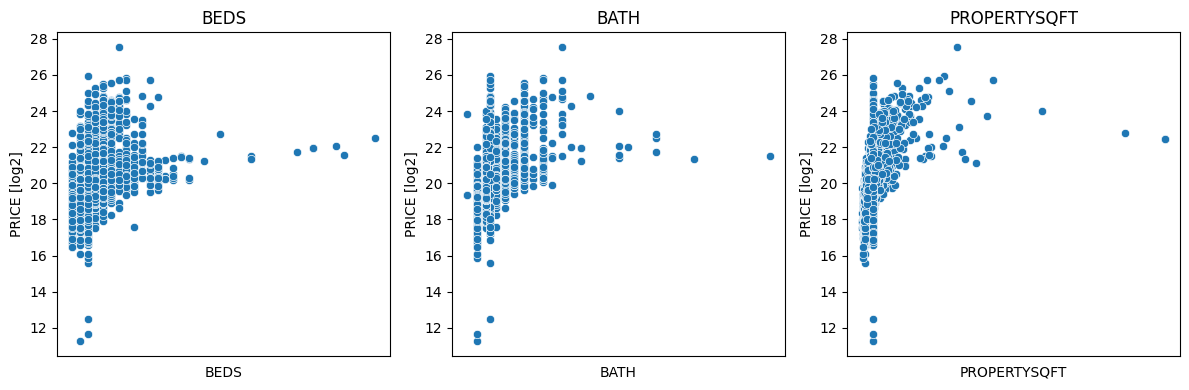

In [14]:
fig, axes = plt.subplots(1,3, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(df_num.columns[df_num.columns != "PRICE"]):
    sns.scatterplot(data=df_num, x= col, y= np.log2(df_num["PRICE"]), ax= axes[i])
    axes[i].set_title(col)
    axes[i].set_xticks([])
    axes[i].set_ylabel("PRICE [log2]")

plt.tight_layout()
plt.show()

<AxesSubplot: >

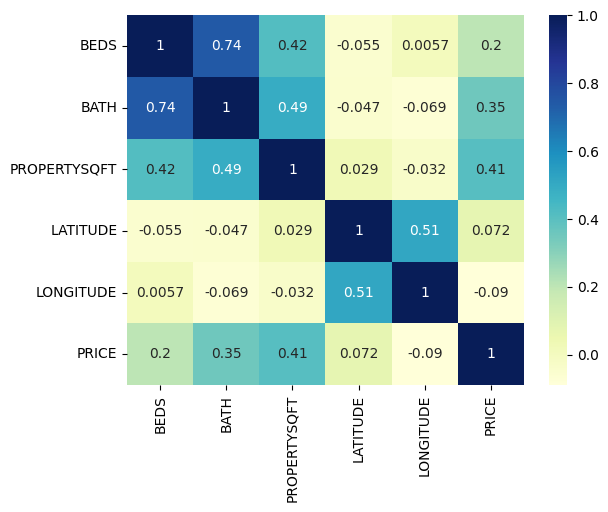

In [15]:
sns.heatmap(df_learning.corr(), annot=True, cmap="YlGnBu")

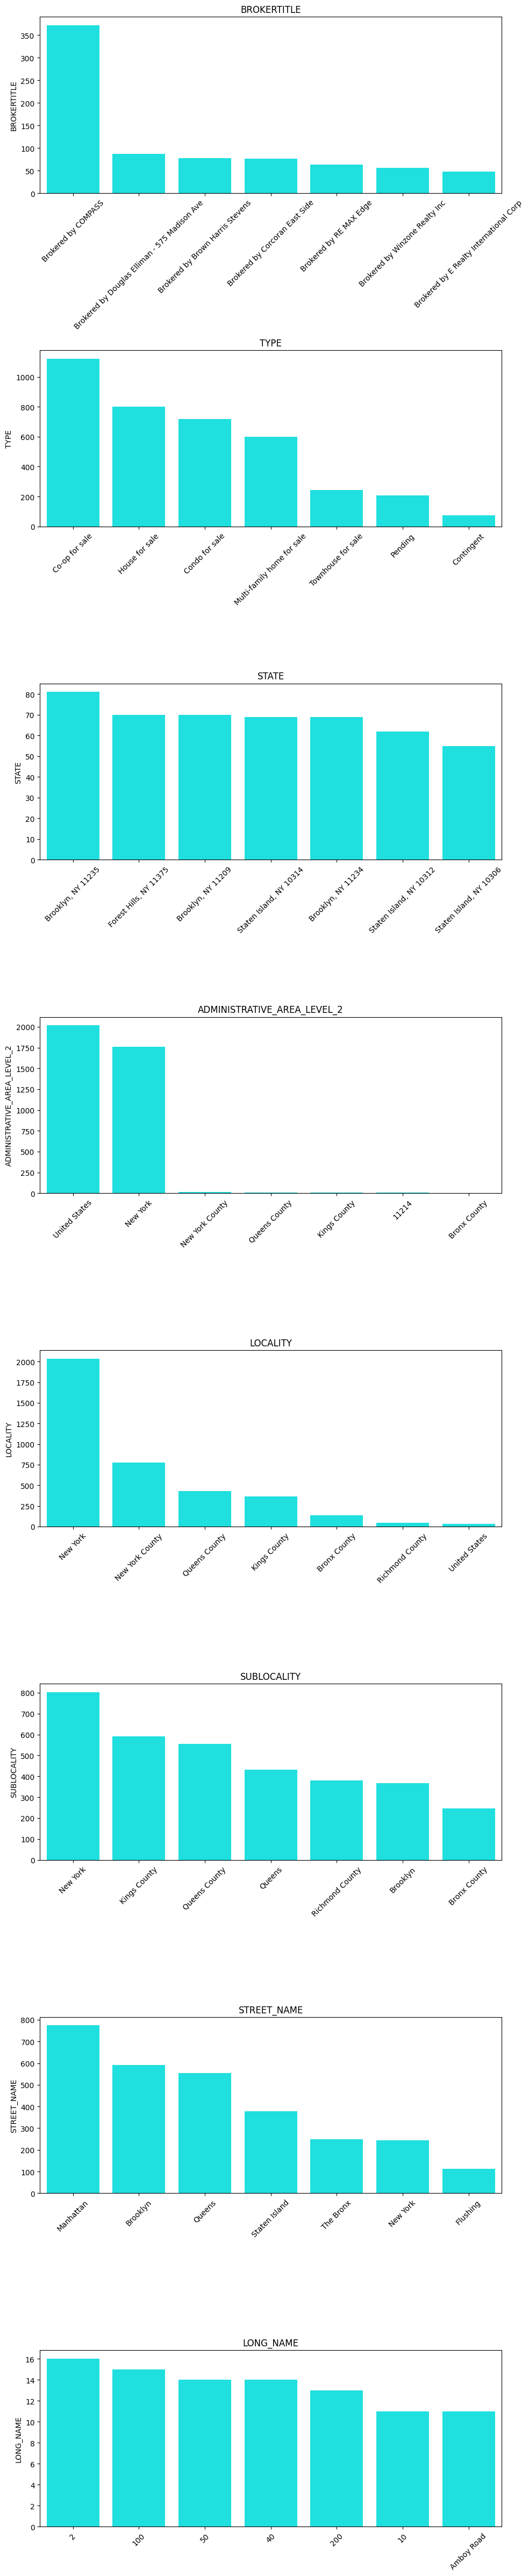

In [21]:
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME", "LONG_NAME"]
fig, axes = plt.subplots(len(cols), 1, figsize=(10, 6 * len(cols)))
axes = axes.flatten()


for i, col in enumerate(cols):
    tmp = df_learning[col].value_counts().head(7)
    sns.barplot(x=tmp.index, y=tmp, ax=axes[i], color="cyan")
    axes[i].set_title(col)
    axes[i].tick_params(axis="x", rotation=45)
    
plt.tight_layout()
plt.show()

                                           BROKERTITLE    MEAN_PRICE
285      Brokered by Douglas Elliman - New Development  4.000000e+07
770                                Brokered by Reserve  3.200000e+07
126  Brokered by Brown Harris Stevens - 43 North Mo...  1.554633e+07
627                     Brokered by New York Residence  1.200000e+07
671  Brokered by Peter Ashe Real Estate- Peter Ashe...  1.175625e+07
888      Brokered by Vandenberg -The Townhouse Experts  9.775000e+06
806                                Brokered by Serhant  9.647848e+06
________________________________________________________________
                          TYPE    MEAN_PRICE
12          Townhouse for sale  6.548859e+06
2               Condo for sale  2.627580e+06
5                     For sale  2.107545e+06
10  Multi-family home for sale  1.654560e+06
7               House for sale  1.652225e+06
6                  Foreclosure  1.480262e+06
11                     Pending  1.391877e+06
_______________________

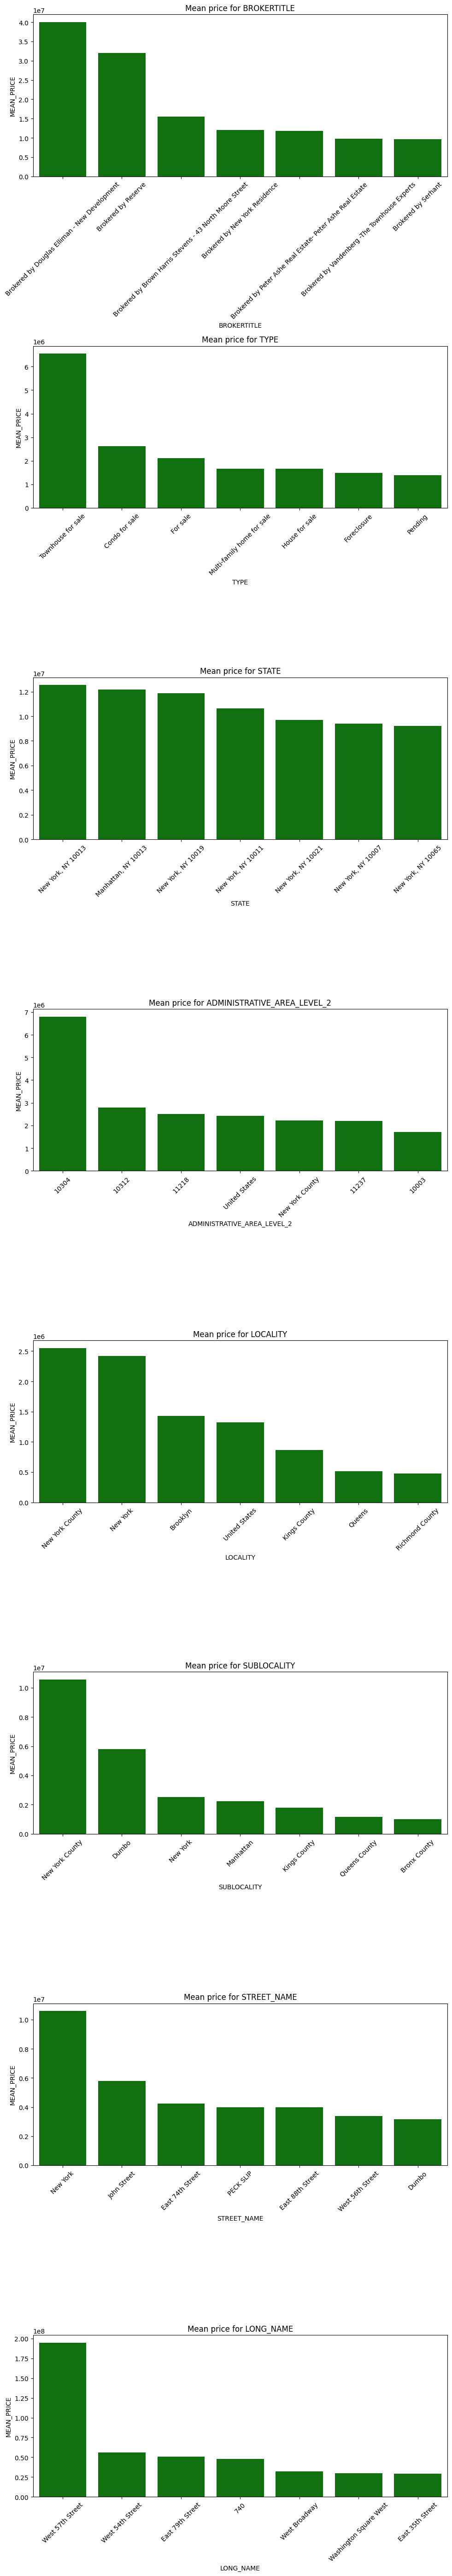

In [31]:
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME", "LONG_NAME"]
fig, axes = plt.subplots(len(cols), 1, figsize=(10, 7 * len(cols)))
axes = axes.flatten()

for i, col in enumerate(cols):
    df_tmp = df_learning[[col, "PRICE"]]
    df_tmp = pd.DataFrame(df_tmp.groupby(col)["PRICE"].mean()).reset_index()
    df_tmp.columns = [col, "MEAN_PRICE"]
    df_tmp = df_tmp.sort_values("MEAN_PRICE", ascending=False)
    df_tmp = df_tmp.head(7)
    print(df_tmp, end= "\n________________________________________________________________\n")
    
    sns.barplot(data= df_tmp, x= col, y= "MEAN_PRICE", ax= axes[i], color= "green")
    axes[i].set_title(f"Mean price for {col}")
    axes[i].tick_params(axis="x", rotation=45)
    
plt.tight_layout()
plt.show()
    
    